<a href="https://colab.research.google.com/github/irdinafiqah/Telco_cust_churn/blob/main/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2090,6661-EIPZC,Female,0,Yes,Yes,48,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),29.50,1423.05,No
4330,4013-TLDHQ,Male,0,No,No,19,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.25,1490.95,Yes
2382,6114-TCFID,Female,0,No,No,29,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),39.50,1082.75,No
3631,2722-JMONI,Female,1,Yes,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.55,49.55,Yes
4616,4338-EYCER,Male,0,Yes,No,21,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),54.60,1125.2,No


In [ ]:
#contents 7043 observations and 22 features
df.shape

(7043, 21)

In [ ]:
#check for missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# customer id is unnecessary
del df["customerID"]

In [ ]:
!pip install sweetviz

In [ ]:
# importing sweetviz library
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(df)

#display the report
advert_report.show_html('Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



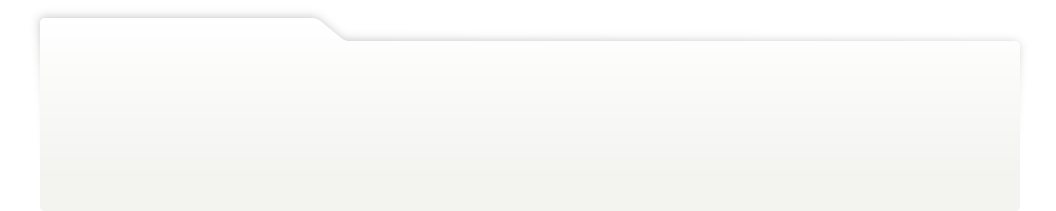
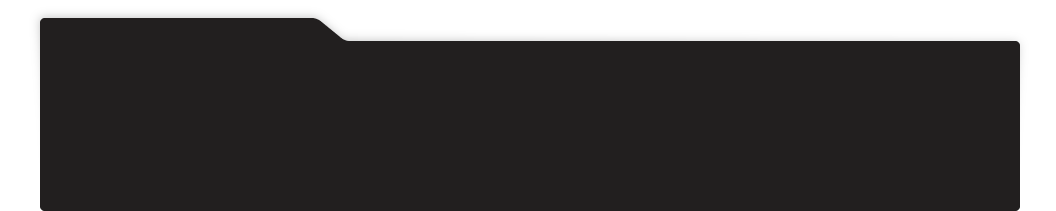
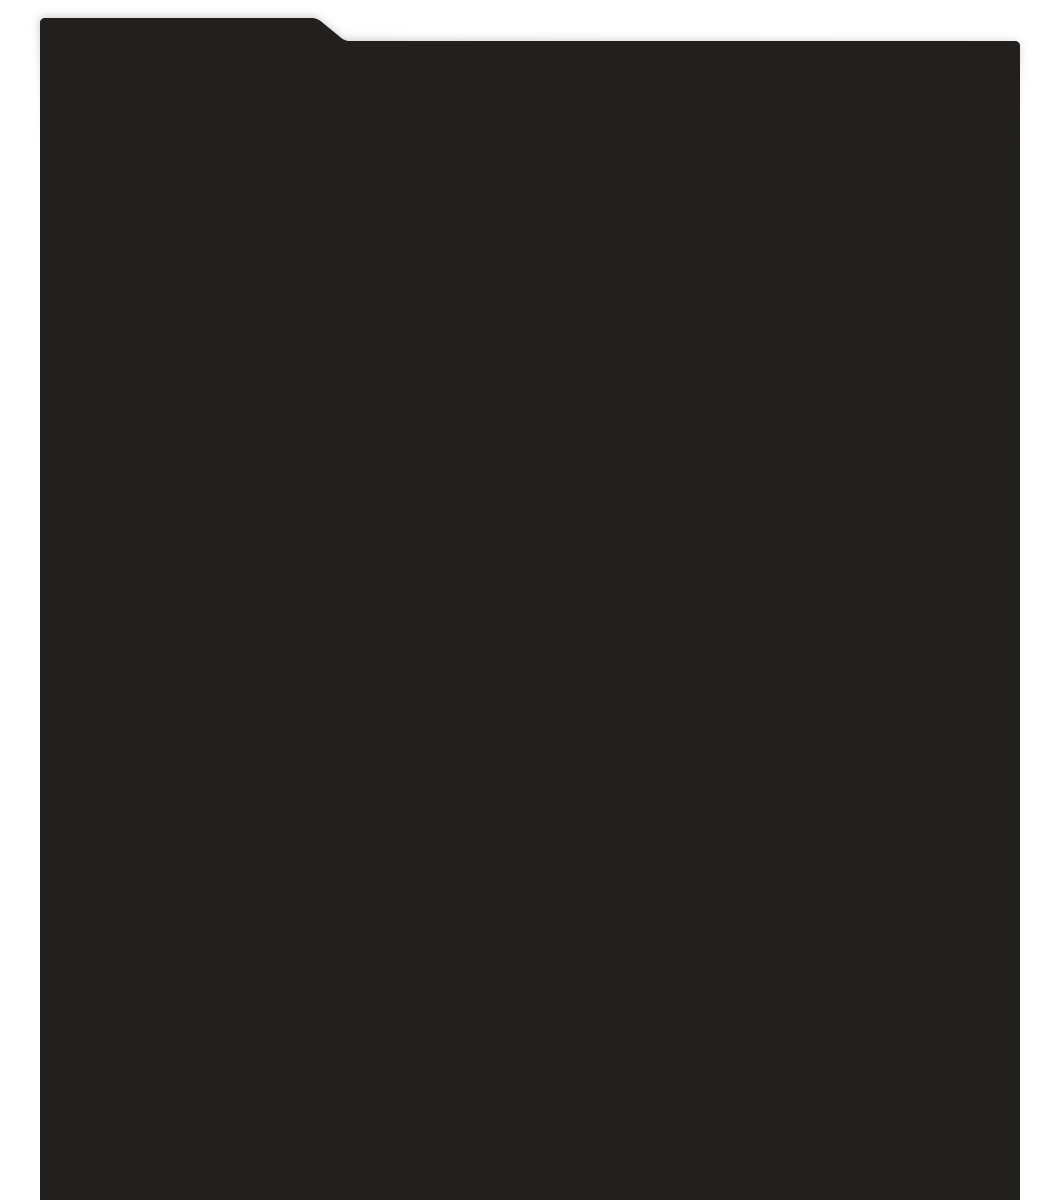
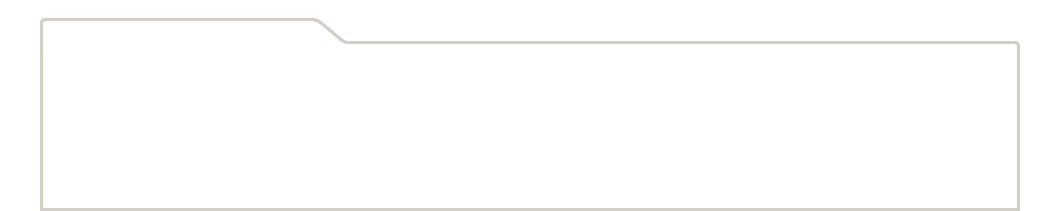
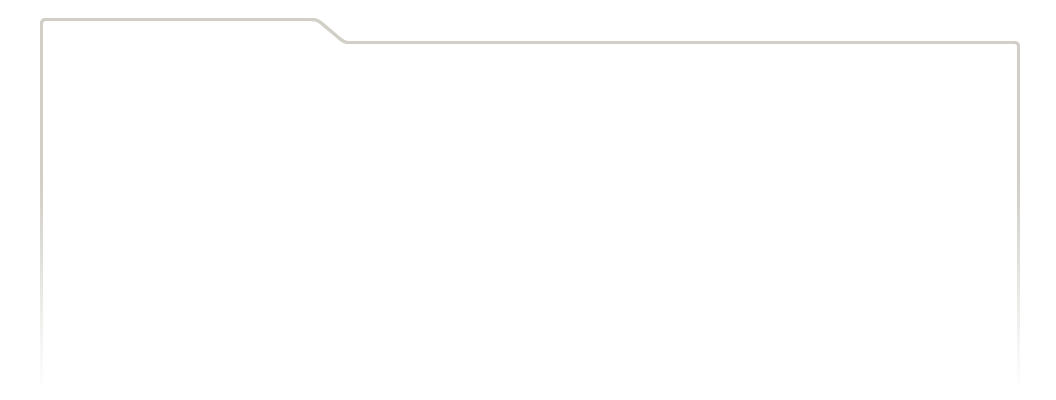
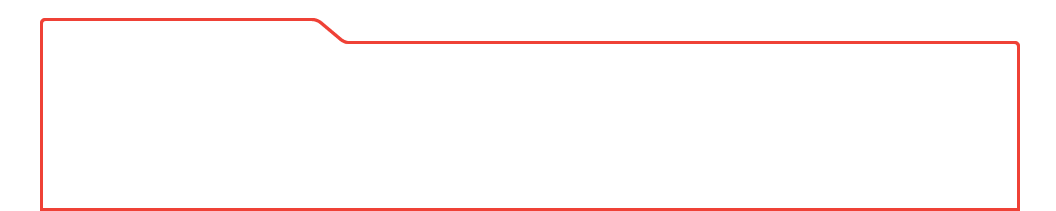
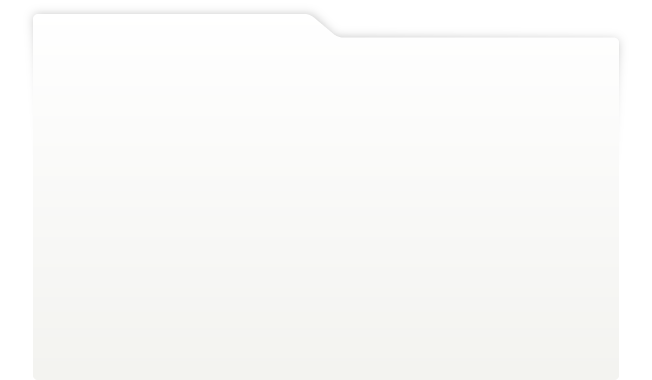
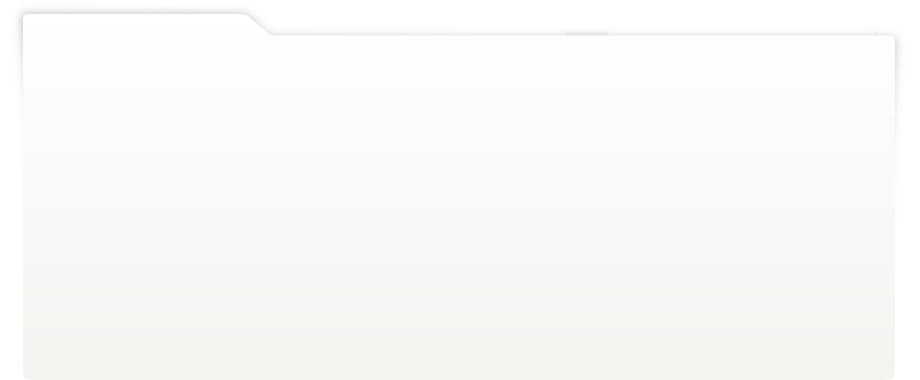
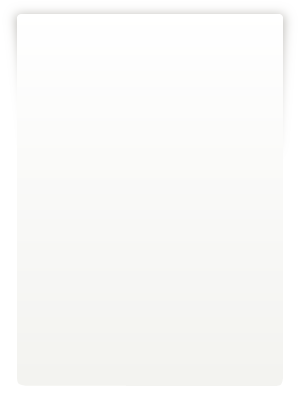
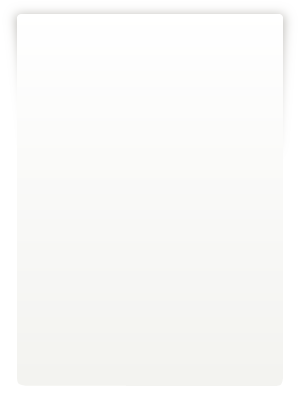
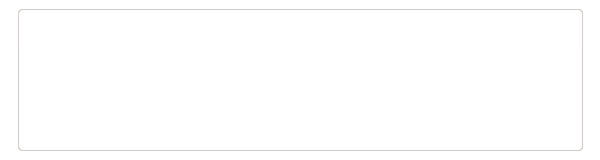
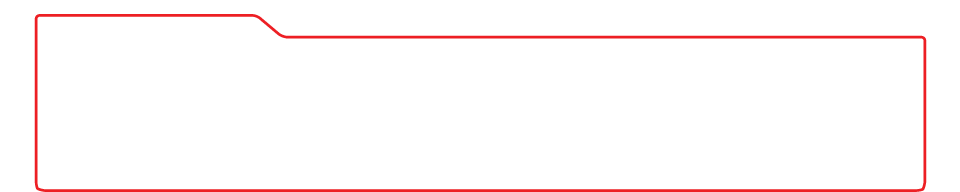
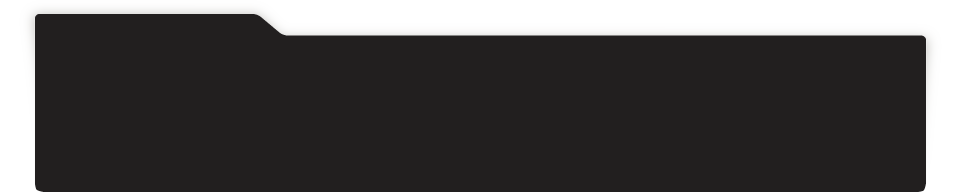
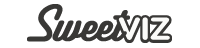
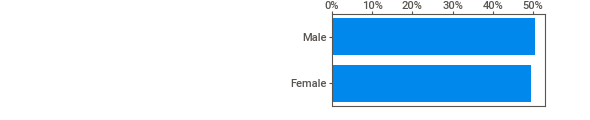
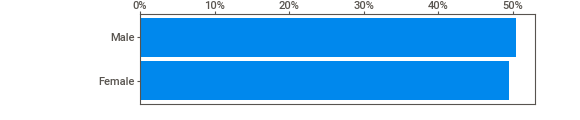
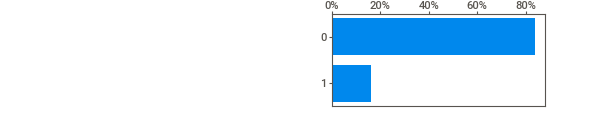
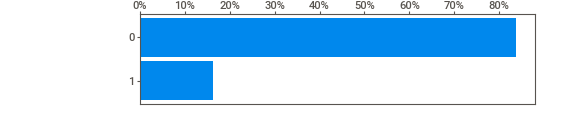
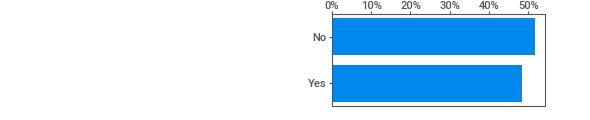
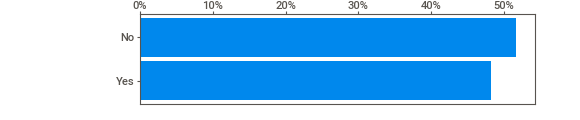
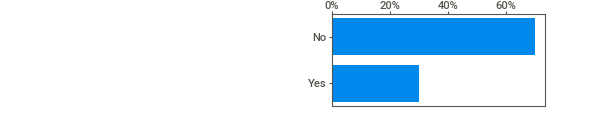
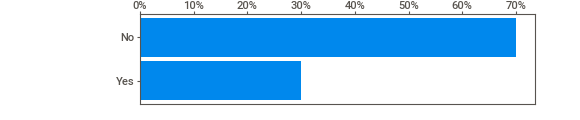
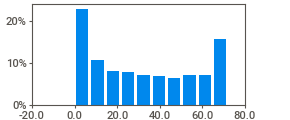
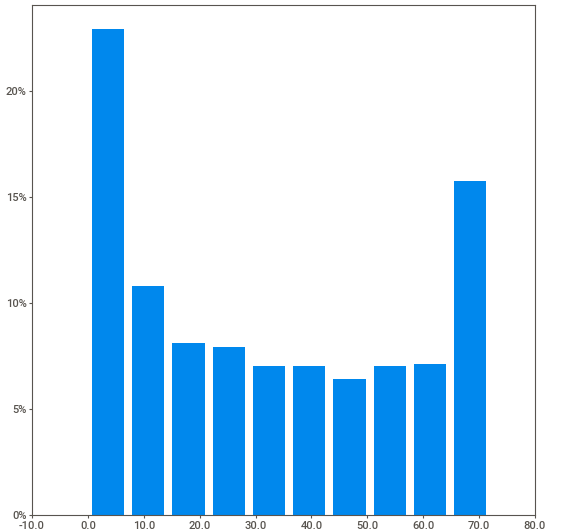
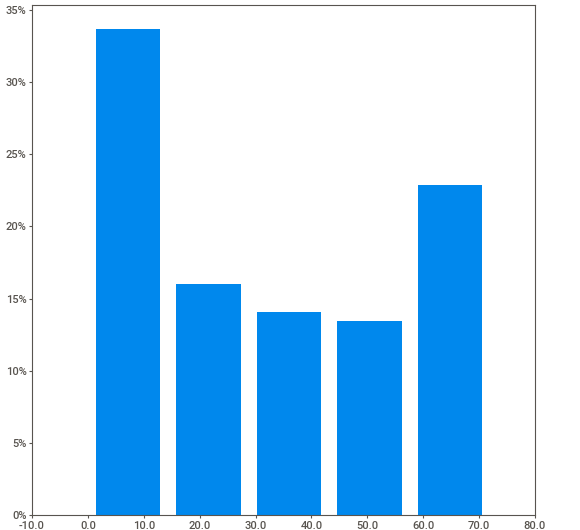
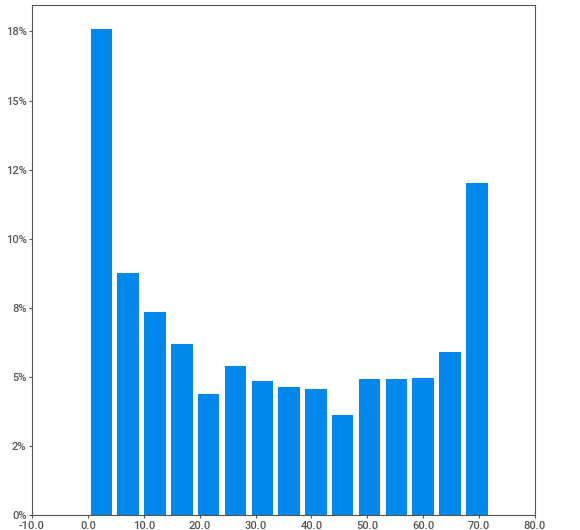
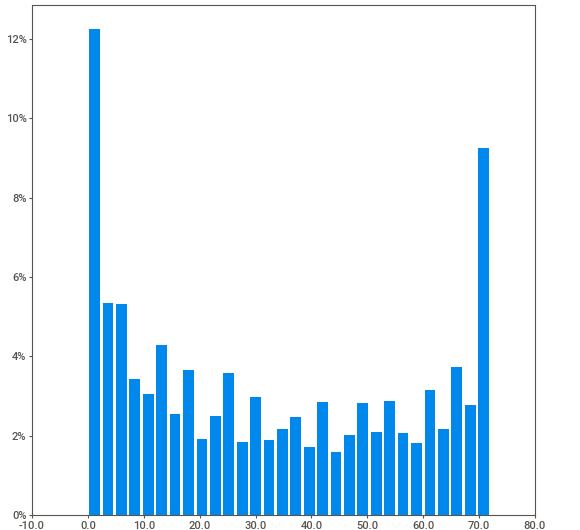
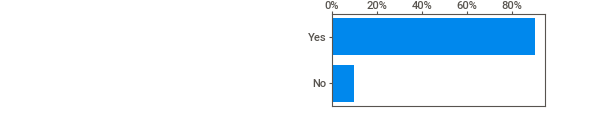
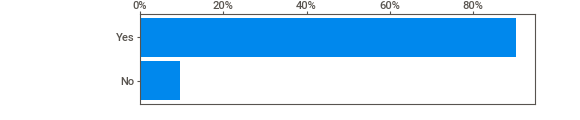
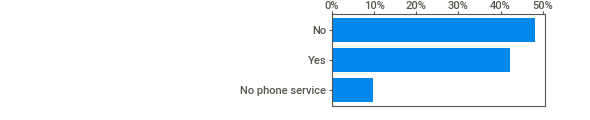
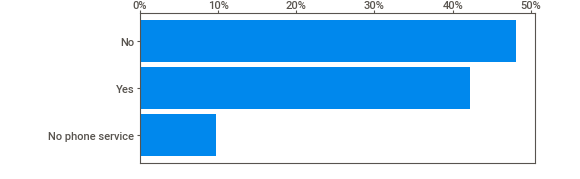
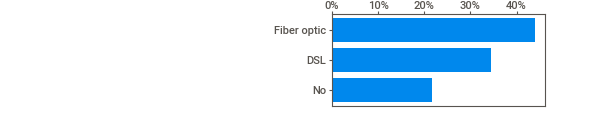
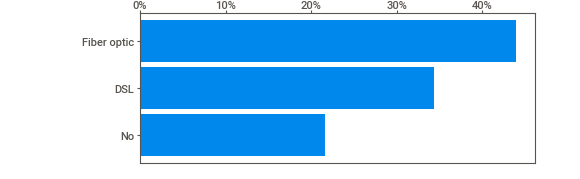
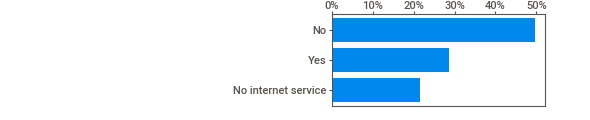
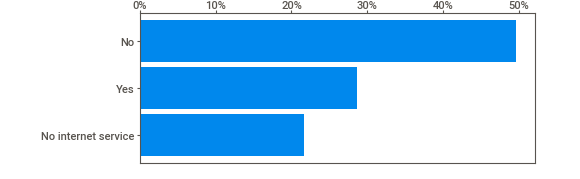
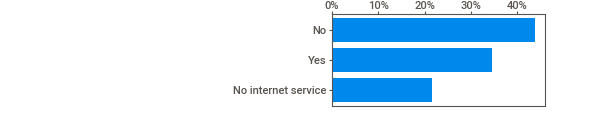
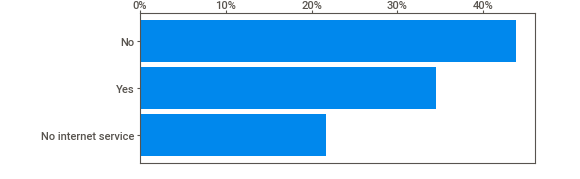
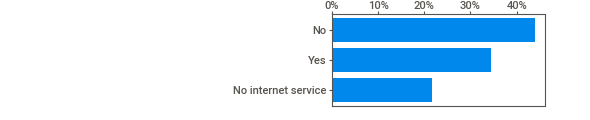
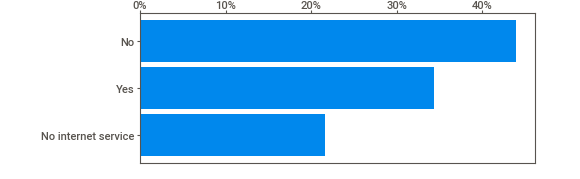
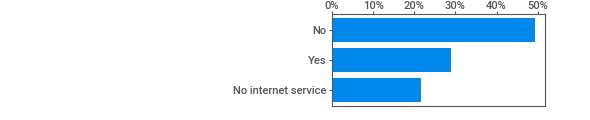
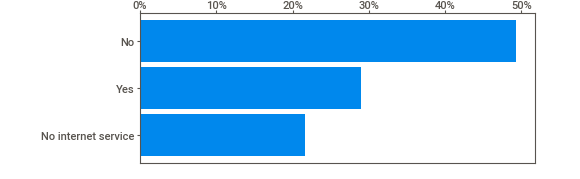
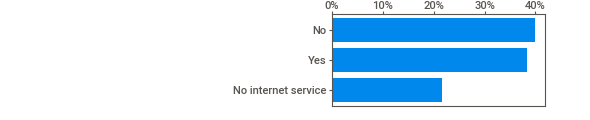
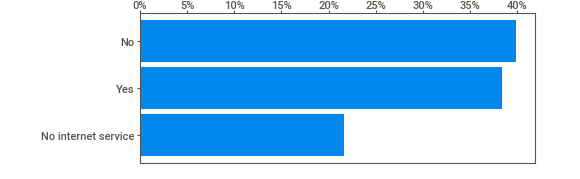
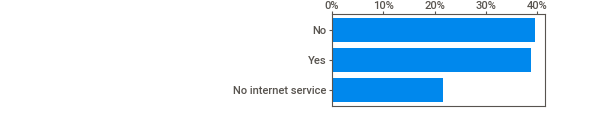
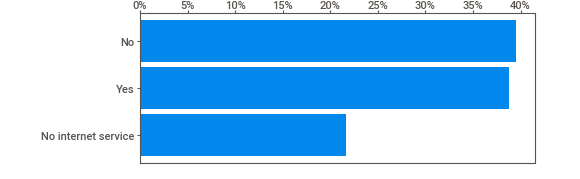
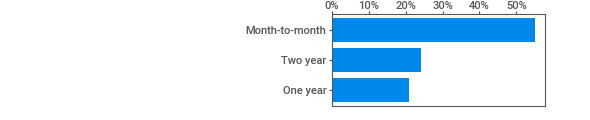
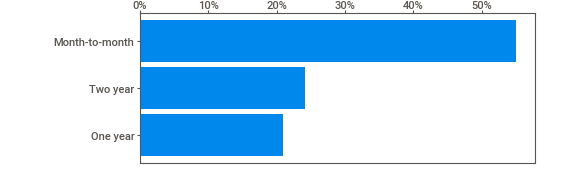
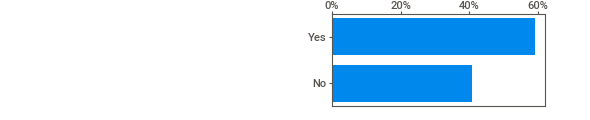
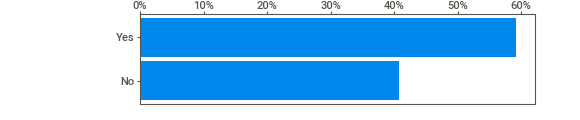
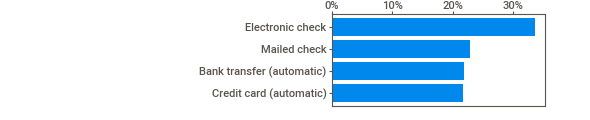
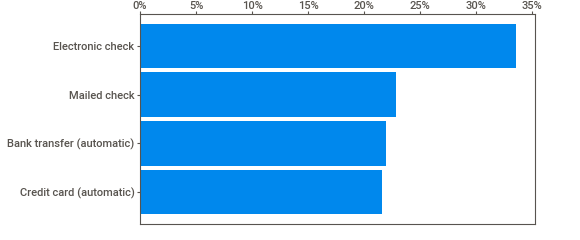
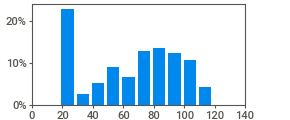
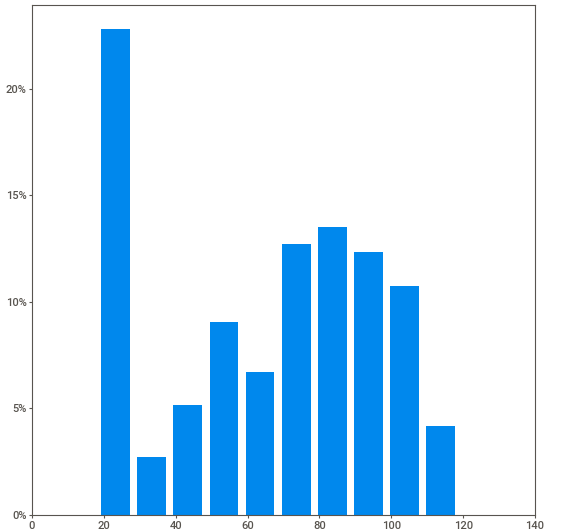
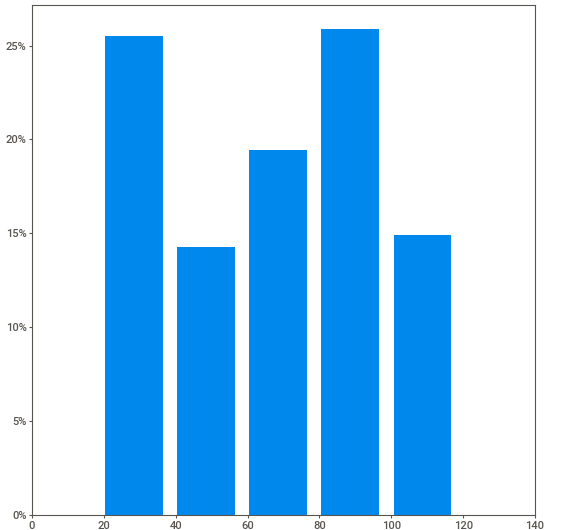
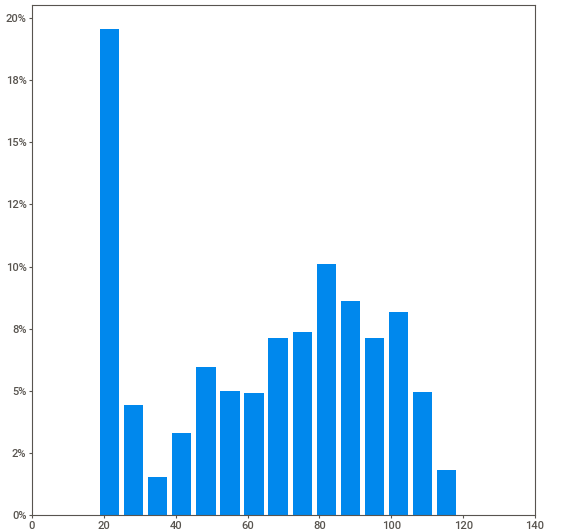
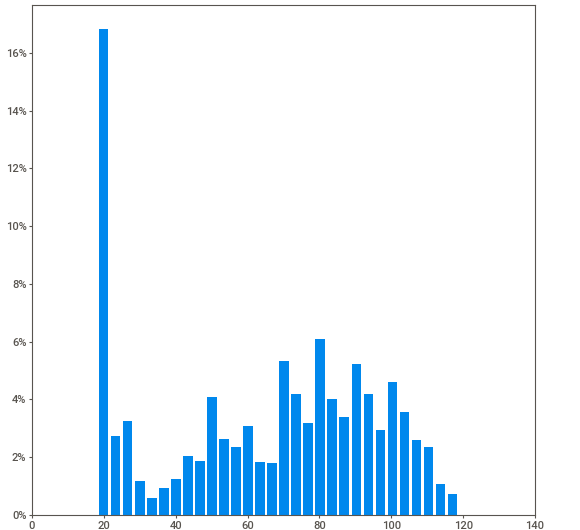
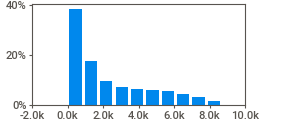
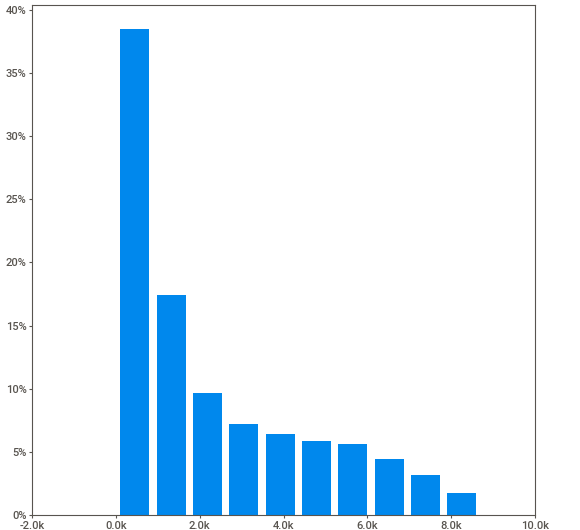
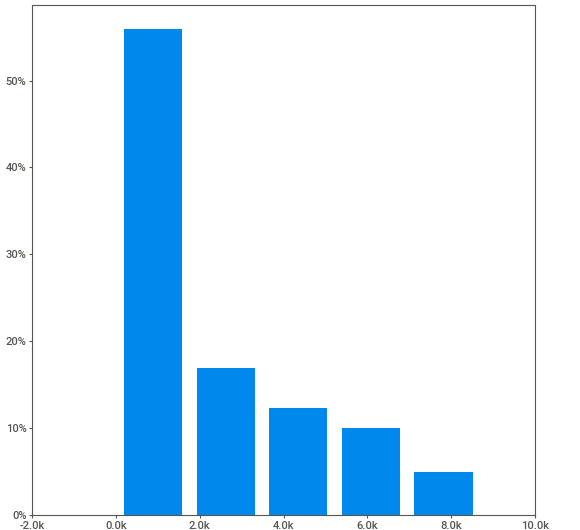
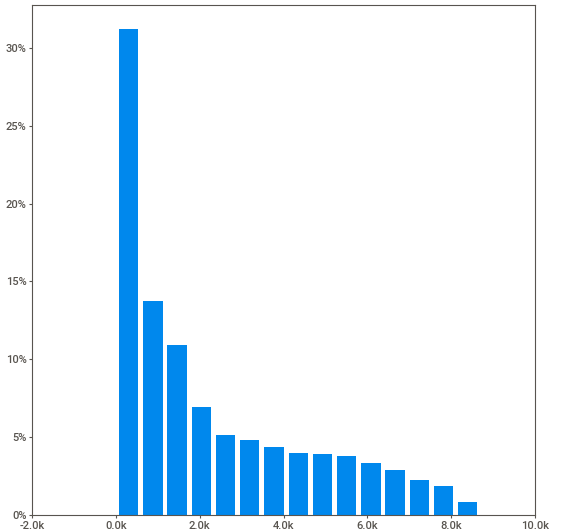
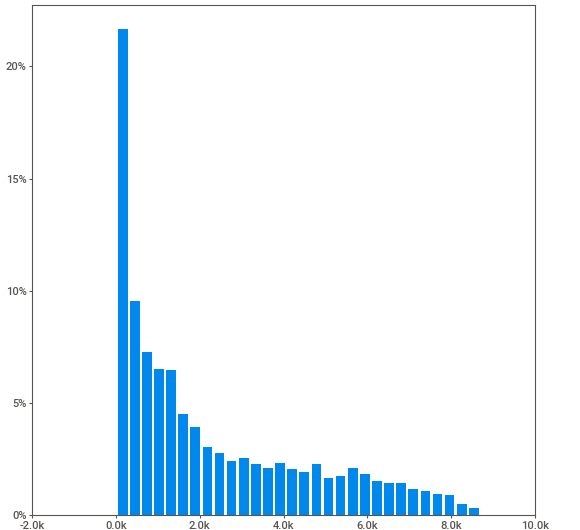
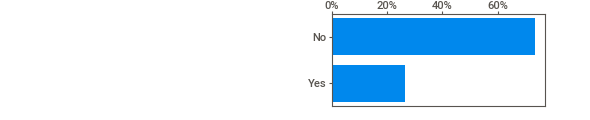
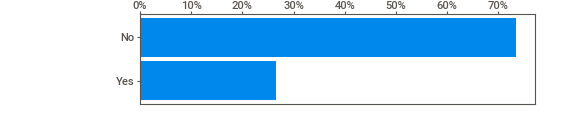
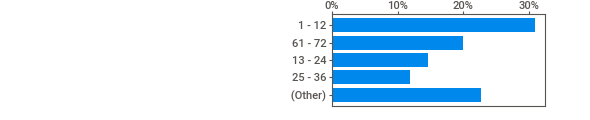
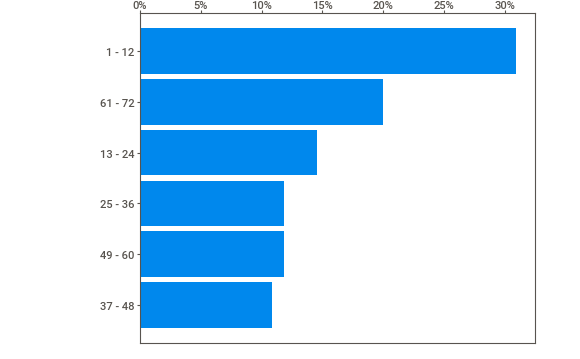
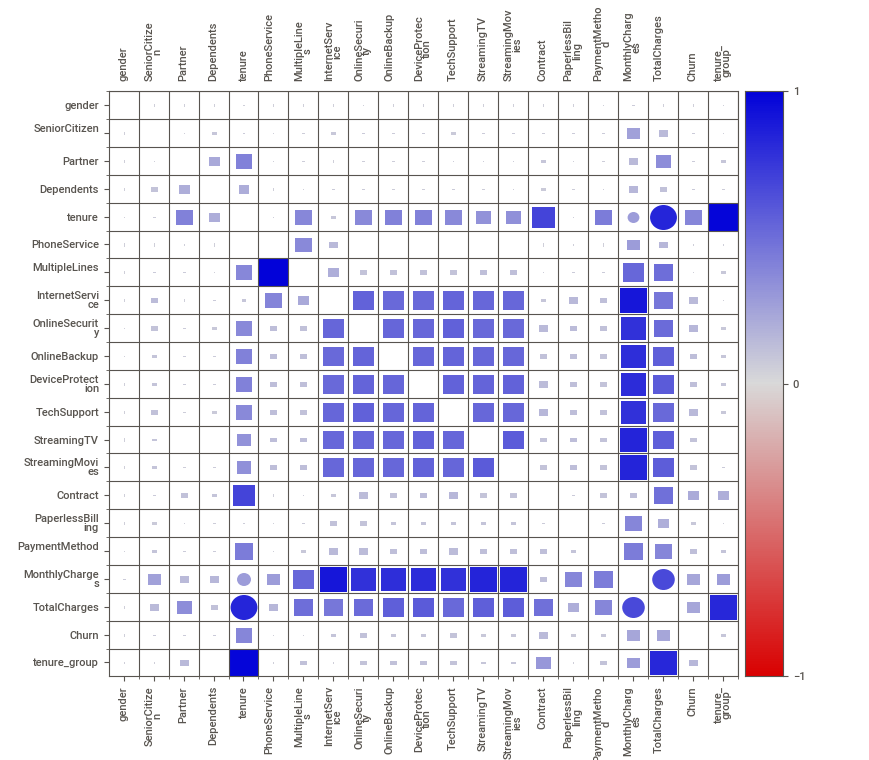
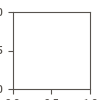

In [ ]:
advert_report.show_notebook()

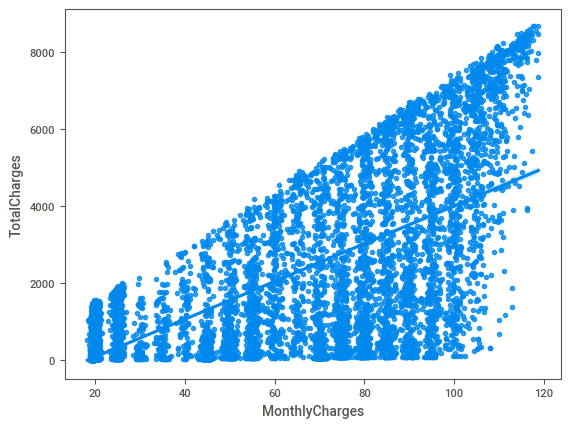

In [ ]:
# converting series object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
sns.regplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges');

In [15]:
# Find the pearson correlations matrix
corr = df.corr(method = 'pearson')
corr

<ipython-input-15-13e2647f7120>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

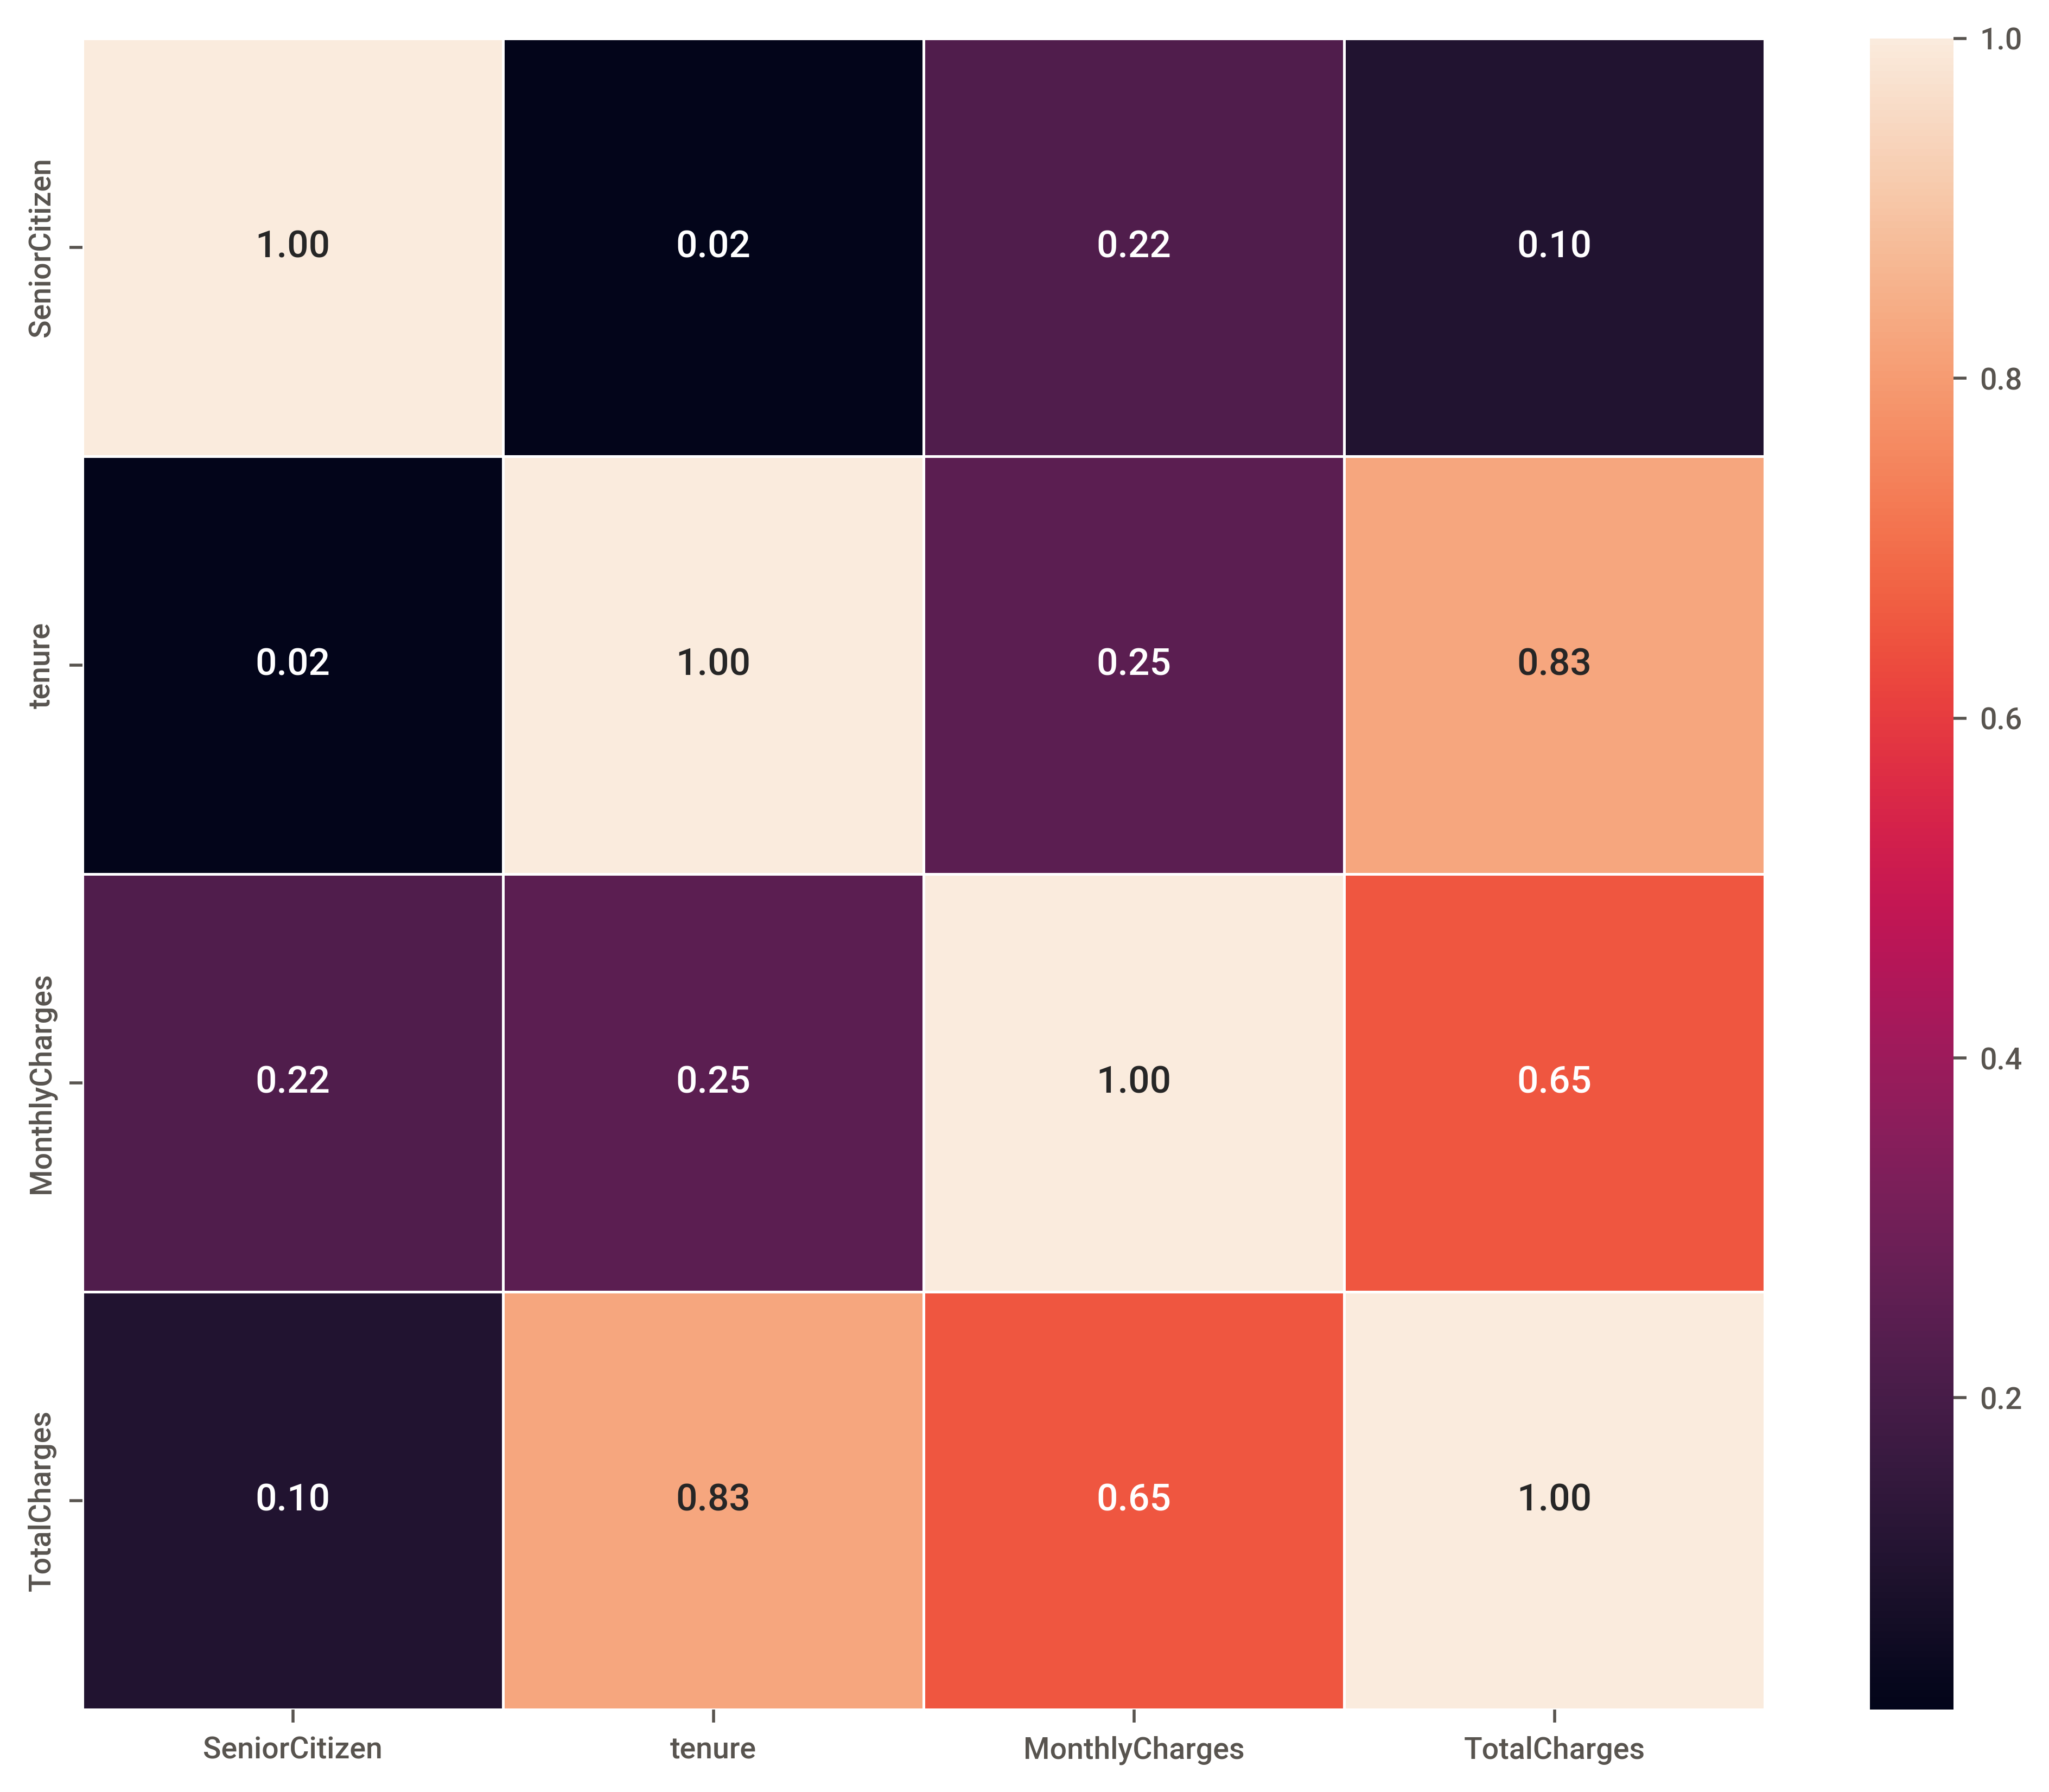

In [ ]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()